In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [6]:
df = pd.read_csv('main_file.csv').iloc[:,1:]
com_col = ['Phase','RID','VISCODE']
df

C:\Users\weipi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,...,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,DX_bl
0,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,NaN,...,0.0,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,CN
1,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,7.0,7.0,9.0,10.0,11.0,CN
2,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,5.0,9.0,9.0,9.0,8.0,CN
3,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,0.0,2.0,1.0,15.0,6.0,6.0,6.0,8.0,8.0,CN
4,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27115,7102,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,341_S_7102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27116,7103,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,013_S_7103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27117,7104,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,153_S_7104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27118,7105,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,035_S_7105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['RID', 'hypertension', 'OSA', 'anxiety', 'depression', 'PTGENDER',
       'PTETHCAT', 'PTRACCAT', 'AGE', 'PTID', 'Phase', 'VISCODE', 'DX',
       'ABETA', 'TAU', 'PTAU', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 'DXCHANGE',
       'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT', 'NPIKSEV', 'insomnia', 'index',
       'GDSATIS', 'GDDROP', 'GDEMPTY', 'GDBORED', 'GDSPIRIT', 'GDAFRAID',
       'GDHAPPY', 'GDHELP', 'GDHOME', 'GDMEMORY', 'GDALIVE', 'GDWORTH',
       'GDENERGY', 'GDHOPE', 'GDBETTER', 'GDTOTAL', 'GDCAT', 'LIMMTOTAL',
       'AVTOT1', 'AVTOT2', 'AVTOT3', 'AVTOT4', 'AVTOT5', 'DX_bl'],
      dtype='object')

### Sleep vs Diagnosis(MCI, AD, NC)

Quick recap:
- ADNI1: DXCURREN 1=NL; 2=MCI; 3=AD
- ADNIGO/2: DXCHANGE    
    1=Stable: NL to NL;    
    2=Stable: MCI to MCI;  
    3=Stable: Dementia to Dementia;   
    4=Conversion: NL to MCI;   
    5=Conversion: MCI to Dementia; 
    6=Conversion: NL to Dementia;  
    7=Reversion: MCI to NL;   
    8=Reversion: Dementia to MCI;   
    9=Reversion: Dementia to NL    
- ADNI3: DIAGNOSIS 1=CN; 2=MCI; 3=Dementia

In [ ]:
f, axes = plt.subplots(len(col_lst)-1, 1,figsize=(8, 60))
for i in range(len(col_lst)-1):
    sns.histplot(data=sleep_dxch['NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT', 'NPIKSEV', 'insomnia','OSA'], x="DXCHANGE", multiple="dodge", shrink=.8, ax=axes[i])

#### drop column 'NPIKSEV', otherwise we get no samples

In [99]:
col_lst = [ 'DXCHANGE','NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT',  'insomnia','OSA']
sleep_dxch = df[com_col + col_lst].set_index(['Phase', 'RID', 'VISCODE']).dropna(how='any',axis=0).reset_index()
sleep_dxch = sleep_dxch[sleep_dxch['VISCODE']!='bl']
sleep_dxch

,Phase,RID,VISCODE,DXCHANGE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,insomnia,OSA
0,ADNI2,8,v06,CN-CN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,1.0,0.0
1,ADNI2,8,v41,CN-MCI,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,1.0,0.0
2,ADNI2,31,v06,CN-CN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0
3,ADNI2,31,v11,CN-CN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0
4,ADNI2,31,v21,CN-CN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,ADNI3,6890,y1,MCI-MCI,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0
1213,ADNI3,6891,y1,AD-AD,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0,3.0,8.0,1.0,0.0
1214,ADNI3,6897,y1,MCI-MCI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1218,ADNI3,6947,y1,MCI-MCI,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [100]:
sleep_dxch.groupby('DXCHANGE').count()

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,insomnia,OSA
DXCHANGE,,,,,,,,,,,,,,,,,
AD-AD,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
AD-MCI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CN-AD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
CN-CN,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291
CN-MCI,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
MCI-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
MCI-CN,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
MCI-MCI,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516


drop DXCHANGE groups 'AD-MCI','CN-AD', then undersampling

In [102]:
sleep_dxch_2g = sleep_dxch.loc[sleep_dxch['DXCHANGE'].isin(['MCI-AD','MCI-MCI'])]
sleep_dxch_2g

,Phase,RID,VISCODE,DXCHANGE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,insomnia,OSA
6,ADNI2,55,v11,MCI-MCI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
9,ADNI2,61,v21,MCI-AD,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
17,ADNI2,112,v31,MCI-MCI,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,2.0,4.0,1.0,0.0
18,ADNI2,112,v41,MCI-AD,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,0.0
19,ADNI3,112,init,MCI-AD,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,2.0,3.0,8.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,ADNI3,6871,y1,MCI-MCI,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0
1210,ADNI3,6888,y1,MCI-MCI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,3.0,1.0,0.0
1212,ADNI3,6890,y1,MCI-MCI,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0
1214,ADNI3,6897,y1,MCI-MCI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [103]:
sleep_dxch_drop = sleep_dxch[(sleep_dxch['DXCHANGE']!='AD-MCI')] 
sleep_dxch_drop = sleep_dxch_drop[sleep_dxch_drop['DXCHANGE']!='CN-AD']
sleep_dxch_drop

,Phase,RID,VISCODE,DXCHANGE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,insomnia,OSA
0,ADNI2,8,v06,CN-CN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,1.0,0.0
1,ADNI2,8,v41,CN-MCI,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,1.0,0.0
2,ADNI2,31,v06,CN-CN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0
3,ADNI2,31,v11,CN-CN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0
4,ADNI2,31,v21,CN-CN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,ADNI3,6890,y1,MCI-MCI,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0
1213,ADNI3,6891,y1,AD-AD,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0,3.0,8.0,1.0,0.0
1214,ADNI3,6897,y1,MCI-MCI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1218,ADNI3,6947,y1,MCI-MCI,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


### oversampling and undersampling

In [109]:
X = sleep_dxch_2g
y = sleep_dxch_2g['DXCHANGE']

In [110]:
# oversampling
ros = RandomOverSampler(random_state=450)
X_oversampled, y_oversampled = ros.fit_resample(X, y)
print(len(X_oversampled),sorted(Counter(y_resampled).items()))

1032 [('AD-AD', 558), ('AD-MCI', 558), ('CN-AD', 558), ('CN-CN', 558), ('CN-MCI', 558), ('MCI-AD', 558), ('MCI-CN', 558), ('MCI-MCI', 558)]


In [111]:
# undersampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=432)
X_undersampled, y_unsampled = rus.fit_resample(X, y)
print(len(X_undersampled),'Resampled dataset shape %s' % Counter(y_unsampled))

160 Resampled dataset shape Counter({'MCI-AD': 80, 'MCI-MCI': 80})


In [112]:
X_undersampled.groupby(['DXCHANGE']).count()

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,insomnia,OSA
DXCHANGE,,,,,,,,,,,,,,,,,
MCI-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
MCI-MCI,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80


### logistic regression, diagnosis changes as the target variable.
use dataframe sleep_dxch

In [113]:
train, test = train_test_split(X_undersampled,test_size=0.2)   
lst = [ 'NPIK1', 'NPIK2', 'NPIK3',
       'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B',
       'NPIK9C', 'NPIKTOT', 'insomnia', 'OSA']
X_train = train[lst]
y_train = train['DXCHANGE']
X_test = test[lst]
y_test = test['DXCHANGE']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.547, Test set score: 0.344
lbfgs_L2,C:0.01, Training set score:0.688, Test set score: 0.594
lbfgs_L2,C:0.1, Training set score:0.695, Test set score: 0.656
lbfgs_L2,C:1, Training set score:0.711, Test set score: 0.688
lbfgs_L2,C:10, Training set score:0.703, Test set score: 0.656
lbfgs_L2,C:100, Training set score:0.695, Test set score: 0.656
saga_L1,C:0.001, Training set score:0.539, Test set score: 0.344
saga_L1,C:0.01, Training set score:0.539, Test set score: 0.344
saga_L1,C:0.1, Training set score:0.672, Test set score: 0.500
saga_L1,C:1, Training set score:0.695, Test set score: 0.656
saga_L1,C:10, Training set score:0.703, Test set score: 0.656
saga_L1,C:100, Training set score:0.695, Test set score: 0.656
newton-cg_L2,C:0.001, Training set score:0.547, Test set score: 0.344
newton-cg_L2,C:0.01, Training set score:0.688, Test set score: 0.594
newton-cg_L2,C:0.1, Training set score:0.695, Test set score: 0.656
newton-cg_L2,C:1, Training set 

## best score: newton-cg_L2,C:1, Training set score:0.711, Test set score: 0.688

### PCA 

Origianl shape: (128, 14)
Reduced shape: (128, 4)
explained variance: [2.68004048 2.03851159 1.51702881 1.18115052]
explained variance ratio: [0.1899359  0.14447041 0.10751264 0.08370877]
Origianl shape: (128, 14)
Reduced shape: (128, 4)
PCA components: 
[[-0.0139345   0.01300685  0.08026685  0.19481503  0.00449014  0.07830122
   0.14247195  0.03860954  0.38330796  0.51974313  0.40682264  0.57503758
   0.09647229  0.0690153 ]
 [ 0.03760583  0.49490189  0.32667741  0.26544189  0.34520443  0.43071006
  -0.24181802 -0.14579305 -0.29607154  0.07942256  0.04799743 -0.09212237
   0.07060659  0.28693153]
 [-0.6250225  -0.02741596  0.37162561  0.06404444  0.20170869  0.01567682
   0.45914737  0.35977299  0.03601286 -0.22308985  0.08522864 -0.1256898
   0.10083985 -0.03010563]
 [ 0.12258757 -0.14387289  0.19273961  0.27101592 -0.03319081 -0.27209191
  -0.37620449  0.42695963 -0.38220878  0.13764096  0.30969364 -0.06667706
   0.10683739 -0.4218008 ]]


Text(0, 0.5, 'Principal components')

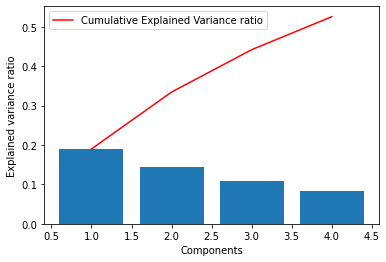

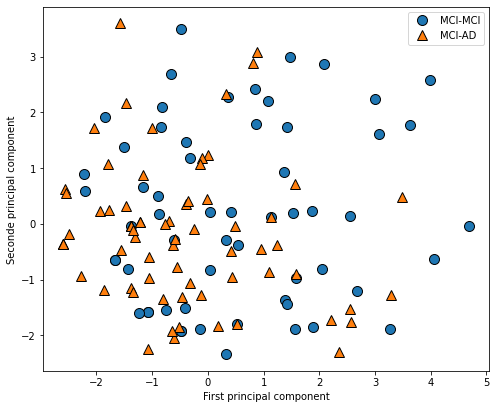

<Figure size 864x864 with 0 Axes>

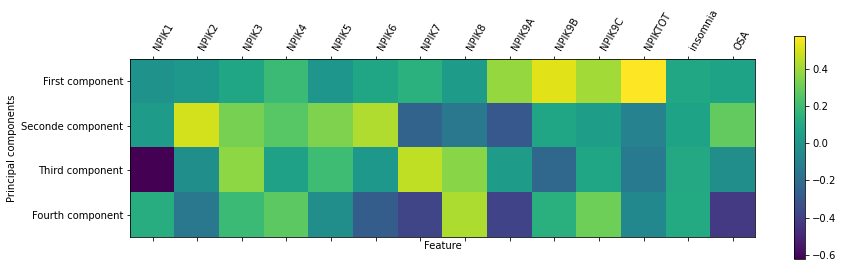

In [114]:
pca = PCA(n_components=4) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DXCHANGE'])
plt.legend(train['DXCHANGE'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [119]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree and random forest with unscaled data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
          .format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
for m in range(5,20):    
    forest = RandomForestClassifier(n_estimators=m*10,random_state=5862)
    forest.fit(X_train,y_train)
    print('Random forest with unscaled data. {} trees. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
          .format(m*10,f1_score(forest.predict(X_train),y_train,average='weighted'),f1_score(forest.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))

# decision tree and random forest with scaled data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train_scaled,y_train)
    print('Decision tree with scaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
          .format(i,f1_score(tree.predict(X_train_scaled),y_train,average='weighted'),f1_score(tree.predict(X_test_scaled),y_test,average='weighted')))
for m in range(5,20):    
    forest = RandomForestClassifier(n_estimators=m*10,random_state=5862)
    forest.fit(X_train_scaled,y_train)
    print('Random forest with scaled data. {} trees. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
          .format(m*10,f1_score(forest.predict(X_train_scaled),y_train,average='weighted'),f1_score(forest.predict(X_test_scaled),y_test,average='weighted')))
    
# decision tree and random forest with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))    
for m in range(5,20):    
    forest = RandomForestClassifier(n_estimators=m*10,random_state=5862)
    forest.fit(X_pca,y_train)
    print('Random forest with unscaled data. {} trees. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
          .format(m*10,f1_score(forest.predict(X_pca),y_train,average='weighted'),f1_score(forest.predict(X_test_pca),y_test,average='weighted')))    
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.752, Test set f-score: 0.464
logistic with PCA data. C:0.001, Training set f1-score:0.699, Test set f1-score: 0.512
logistic with PCA data. C:0.01, Training set f1-score:0.723, Test set f1-score: 0.500
logistic with PCA data. C:0.1, Training set f1-score:0.658, Test set f1-score: 0.713
logistic with PCA data. C:1, Training set f1-score:0.673, Test set f1-score: 0.713
logistic with PCA data. C:10, Training set f1-score:0.673, Test set f1-score: 0.713
logistic with PCA data. C:100, Training set f1-score:0.673, Test set f1-score: 0.713
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.648 f1-score on test data: 0.474
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.657 f1-score on test data: 0.784
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.735 f1-score on test data: 0.746
Decision tree with unscaled data. tree depth: 4.000. f1-score on tr

Random forest with unscaled data. 70 trees. f1-score on training data: 0.977 f1-score on test data: 0.625
Random forest with unscaled data. 80 trees. f1-score on training data: 0.977 f1-score on test data: 0.660
Random forest with unscaled data. 90 trees. f1-score on training data: 0.977 f1-score on test data: 0.590
Random forest with unscaled data. 100 trees. f1-score on training data: 0.977 f1-score on test data: 0.625
Random forest with unscaled data. 110 trees. f1-score on training data: 0.977 f1-score on test data: 0.590
Random forest with unscaled data. 120 trees. f1-score on training data: 0.977 f1-score on test data: 0.619
Random forest with unscaled data. 130 trees. f1-score on training data: 0.977 f1-score on test data: 0.619
Random forest with unscaled data. 140 trees. f1-score on training data: 0.977 f1-score on test data: 0.653
Random forest with unscaled data. 150 trees. f1-score on training data: 0.977 f1-score on test data: 0.619
Random forest with unscaled data. 160 tr

Decision tree with unscaled data. tree depth: 6.000. f1-score on training data: 0.844 f1-score on test data: 0.680
Random forest with unscaled data. 50 trees. f1-score on training data: 0.977 f1-score on test data: 0.682

### feature selections from previous work

## use dataframe sleep_dx, target_variable 'DX'

In [ ]:
sleep_dx

In [ ]:
train, test = train_test_split(sleep_dx.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX']
X_test = test[lst]
y_test = test['DX']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

In [ ]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX'])
plt.legend(train['DX'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First component','Seconde component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [ ]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

In [ ]:
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,12],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))

## use dataframe sleep_dxbl, target_variable 'DX_bl'

In [ ]:
sleep_dxbl

In [ ]:
train, test = train_test_split(sleep_dxbl.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX_bl']
X_test = test[lst]
y_test = test['DX_bl']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

In [ ]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX_bl'])
plt.legend(train['DX_bl'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [ ]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

### neurobat.csv
The Neuropsychological Assessment Battery (NAB; Stern & White, 2003) is a comprehensive test battery that assesses five cognitive domains (Attention, Language, Memory, Spatial, and Executive Functions).

In [ ]:
neubat_s = pd.read_csv('neurobat_short.csv',sep=',').iloc[:,1:].drop(['RAVLT_perc_forgetting'],axis=1).replace(-1, np.NaN).replace(-4, np.NaN)
neubat_s = neubat_s.dropna(subset=neubat_s.columns[3:],how='all').dropna(axis=1, how='all')
neubat_s

In [ ]:
neubat_s.info()

### brain volume

In [ ]:
df = pd.read_csv('main_file.csv').iloc[:,1:]

In [ ]:
df.columns

In [ ]:
sleep_neub_ss_dxch = neubat_ss.merge(sleep_dxch,how='inner',on=com_col)
sleep_neub_ss_dxch

In [ ]:
neubat_ss = pd.read_csv('neurobat_supershort.csv').dropna(how='any').iloc[:,1:]
neubat_ss

In [ ]:
# quick check PCA

def PCA_(df_X,n):
    # data scaling
    scaler = StandardScaler()
    scaler.fit(df_X)
    X_scaled = scaler.transform(df_X)
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    print("Origianl shape: {}".format(str(X_scaled.shape)))
    print("Reduced shape: {}".format(str(X_pca.shape)))
    print("explained variance: {}".format(pca.explained_variance_))
    print("explained variance ratio: {}".format(pca.explained_variance_ratio_))
    plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Components')
    plt.plot(range(1,len(pca.explained_variance_ )+1),
             np.cumsum(pca.explained_variance_ratio_),
             c='red',
             label="Cumulative Explained Variance ratio")
    plt.legend(loc='upper left')


In [ ]:
PCA_(neubat_ss.iloc[:,3:],4)

### sleep vs brain volume

In [ ]:
sleep_brain_v = pd.read_csv('sleep_brain_v.csv').iloc[:,1:]
sleep_brain_v

#### sleep vs brainvolume

NPIKTOT has no data to any of the brain volume data or biomarkers

In [ ]:
sleep_brain_v.columns

In [ ]:
sleep_lst = ['NPIK1', 'NPIK2', 'NPIK3', 'NPIK4',
       'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B', 'NPIK9C',
       'NPIKTOT', 'NPIKSEV', 'insomnia', 'OSA','ratio_ABETA_bl', 'ratio_TAU_bl',
       'ratio_PTAU_bl']
cat_lst = ['ratio_Ventricles_bl','ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl',
       'ratio_PTAU_bl']
new_cat_lst = ['Ventricles_reduction_per_year','Hippocampus_reduction_per_year','wholebrain_reduction_per_year','Entorhinal_reduction_per_year',
               'Fusiform_reduction_per_year','ICV_reduction_per_year','ABETA_reduction_per_year','TAU_reduction_per_year','PTAU_reduction_per_year']

In [ ]:
#sns.set_theme(style="ticks")
#sns.pairplot(sleep_brain_v[sleep_lst + new_cat_lst])

In [ ]:
fig, axes = plt.subplots(nrows=54, ncols=3, figsize=(18,280))
axes = axes.ravel()  # array to 1D
for j in range(len(sleep_lst)):
    for i in range(len(cat_lst)):
        axes[i+j*9].scatter(sleep_brain_v[sleep_lst[j]], sleep_brain_v[cat_lst[i]])
        axes[i+j*9].set(title=f'{sleep_lst[j]} vs {cat_lst[i]}', xlabel=None)   
fig.tight_layout()
plt.show()

NPIKSEV, insomnia, OSA have data available to correlate to 

NPIKSEV vs brain volume ratio to baseline

In [ ]:
sleep_brain_v = sleep_brain_v.drop(['NPIK1', 'NPIK2', 'NPIK3', 'NPIK4',
       'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B', 'NPIK9C',
       'NPIKTOT'],axis=1)
sleep_brain_v

In [ ]:
sleep_brain_red = sleep_brain_v.dropna(how='any',axis=0).reset_index().drop(['index'],axis=1)  # reduced
sleep_brain_red

In [ ]:
sleep_brain_red.columns

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(sleep_brain_red[['NPIKSEV', 'insomnia', 'OSA',
       'ratio_Ventricles_bl', 'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl',
       'ratio_Entorhinal_bl', 'ratio_Fusiform_bl', 'ratio_ICV_bl',
       'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl']])

In [ ]:
sleep_brain_red.columns

In [ ]:
train,test = train_test_split(sleep_brain_red,random_state=586,test_size=0.25)

In [ ]:
train.index

In [ ]:
test.index

In [ ]:
X_train = train[['NPIKSEV', 'insomnia', 'OSA',
       'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl']]
X_test = test[['NPIKSEV', 'insomnia', 'OSA',
       'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl']]
y_lst = ['Ventricles_reduction_per_year', 'Hippocampus_reduction_per_year',
       'wholebrain_reduction_per_year', 'Entorhinal_reduction_per_year',
       'Fusiform_reduction_per_year', 'ICV_reduction_per_year',
       'ABETA_reduction_per_year', 'TAU_reduction_per_year',
       'PTAU_reduction_per_year','ratio_Ventricles_bl', 'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl',
       'ratio_Entorhinal_bl', 'ratio_Fusiform_bl', 'ratio_ICV_bl',
       'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl']
alpha_lst = [0.01,0.1,1,10]
for i in range(len(y_lst)):
    y_train = train[y_lst[i]]
    y_test = test[y_lst[i]]
    for j in range(len(alpha_lst)):
        
        ridge = Ridge(alpha = alpha_lst[j]).fit(X_train,y_train)
        print('{}: target feature {}: alpha = {}; training set score: {:.3f}; test set score {:.3f}'.format('Ridge',y_lst[i],alpha_lst[j],lr.score(X_train,train_whole_brain),lr.score(X_test,test_whole_brain)))
        lasso = Lasso(alpha = alpha_lst[j]).fit(X_train,y_train)
        print('{}: target feature {}: alpha = {}; training set score: {:.3f}; test set score {:.3f}'.format('Lasso',y_lst[i],alpha_lst[j],lr.score(X_train,train_whole_brain),lr.score(X_test,test_whole_brain)))
        

In [ ]:
# scale data to use PCA
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=3) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
             np.cumsum(pca.explained_variance_ratio_),
             c='red',
             label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')
plt.show()

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=3) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['wholebrain_reduction_per_year'])
plt.legend(train['wholebrain_reduction_per_year'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


## try to use all variables to predict diagnosis

In [ ]:
main_file = pd.read_csv('main_file.csv',sep=',')
main_2 = main_file[com_col + ['DX','DXCHANGE']]
sleep_bio_brain_dx = sleep_brain_v.merge(main_2,how='left',on=com_col).dropna(axis=1, how='all')
sleep_bio_brain_dx 

In [ ]:
sleep_bio_brain_dx = sleep_bio_brain_dx.dropna(how='any',axis=0)
train,test = train_test_split(sleep_bio_brain_dx,random_state=586,test_size=0.25)
X_train = train.drop(['Phase', 'RID', 'VISCODE','PTID','DX','DXCHANGE'],axis=1)
X_test = test.drop(['Phase', 'RID', 'VISCODE','PTID','DX','DXCHANGE'],axis=1)
y_lst = ['DX','DXCHANGE']
for j in range(len(y_lst)):
    y_train = train[y_lst[j]]
    y_test = test[y_lst[j]]
    print('target feature: {}'.format(y_lst[j]))
    for i in range(1,14):
        tree = DecisionTreeClassifier(random_state=5850,max_depth=i,criterion='gini')
        tree.fit(X_train,y_train)
        print('    Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
              .format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
        forest = RandomForestClassifier(n_estimators = 200, random_state = 560)
        forest.fit(X_train,y_train)
        print('    Random forest with unscaled data. n_estimators: 200. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
              .format(i,f1_score(forest.predict(X_train),y_train,average='weighted'),f1_score(forest.predict(X_test),y_test,average='weighted')))
    # MLP with unscaled data
    mlp = MLPClassifier(solver='lbfgs',random_state=785,hidden_layer_sizes = [100,100],max_iter=40000)
    mlp.fit(X_train,y_train)
    print('    -MLP with uscaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
      .format(f1_score(mlp.predict(X_train),y_train,average='weighted'),f1_score(mlp.predict(X_test),y_test,average='weighted')))

For the target feature DXCHANGE tree depth of 3 works best. 

with f1-score on training data: 0.786 f1-score on test data: 0.606

In [ ]:
# scaled data 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for j in range(len(y_lst)):
    y_train = train[y_lst[j]]
    y_test = test[y_lst[j]]
    print('target feature: {}'.format(y_lst[j]))
    for i in range(2,14):
        tree = DecisionTreeClassifier(random_state=5850,max_depth=i,criterion='gini')
        tree.fit(X_train_scaled,y_train)
        print('    Decision tree with scaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
              .format(i,f1_score(tree.predict(X_train_scaled),y_train,average='weighted'),f1_score(tree.predict(X_test_scaled),y_test,average='weighted')))
        forest = RandomForestClassifier(n_estimators = 200, random_state = 560)
        forest.fit(X_train_scaled,y_train)
        print('    Random forest with scaled data. n_estimators: 200. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
              .format(i,f1_score(forest.predict(X_train_scaled),y_train,average='weighted'),f1_score(forest.predict(X_test_scaled),y_test,average='weighted')))
    # MLP with scaled data
    mlp = MLPClassifier(solver='lbfgs',random_state=785,hidden_layer_sizes = [200,200],max_iter=40000)
    mlp.fit(X_train_scaled,y_train)
    print('    -MLP with uscaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
      .format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))

 DXCHANGE: Decision tree with scaled data. tree depth: 3.000. f1-score on training data: 0.786 f1-score on test data: 0.606
 
 DX: Decision tree with scaled data. tree depth: 2.000. f1-score on training data: 0.778 f1-score on test data: 0.487

In [ ]:
# PCA
pca = PCA(n_components=X_train_scaled.shape[1]) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
             np.cumsum(pca.explained_variance_ratio_),
             c='red',
             label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')
plt.show()

# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DXCHANGE'])
plt.legend(train['DXCHANGE'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')


plt.figure(figsize=(18,18))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6],['First component','Seconde component','Third component','Fourth component','Fifth component','Sixth component','seventh component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

In [ ]:
# decision tree with PCA data 

for k in range(len(y_lst)):
    y_train = train[y_lst[k]]
    y_test = test[y_lst[k]]
    print('- target feature: {}'.format(y_lst[k]))
    max_f1_test = 0
    max_n_component = 0
    tree_depth = 0
    _f1_train = 0
    for j in range(2,X_train_scaled.shape[1]):
        pca = PCA(n_components=j) # keep the first j principal components of the data
        pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
        X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
        X_test_pca = pca.transform(X_test_scaled)
        #print('   - Decision tree with PCA {} components:'.format(j))
        
        for i in range(1,14):
            tree = DecisionTreeClassifier(random_state=580,max_depth=i,criterion='gini')
            tree.fit(X_pca,y_train)
            f1_score_test = f1_score(tree.predict(X_test_pca),y_test,average='weighted')
            f1_score_train = f1_score(tree.predict(X_pca),y_train,average='weighted')
            #print('        - tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(i,f1_score_train,f1_score_test))
            forest = RandomForestClassifier(n_estimators = 200, random_state = 560)
        forest.fit(X_pca,y_train)
        print('    Random forest with pca data. n_estimators: 200. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'
              .format(i,f1_score(forest.predict(X_pca),y_train,average='weighted'),f1_score(forest.predict(X_test_pca),y_test,average='weighted')))
        if f1_score_test >= max_f1_test:
                max_f1_test = f1_score_test
                _f1_train = f1_score_train
                max_n_component = j
                tree_depth = i
    print('The decision tree model predicting target feature {} with {:.3f} components, tree-depth of {} has the best f1-score on test set {:.3f}, on train set{:.3f}.'
          .format(y_lst[k],max_n_component,tree_depth, max_f1_test,_f1_train))
        

To predict feature DX

In [ ]:
y_train = train['DX']
y_test = test['DX']
clf = tree.DecisionTreeClassifier(random_state=580,max_depth=5,criterion='gini')
clf = clf.fit(X_pca,y_train)
fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf,fontsize=15)

To predict feature DXCHANGE

In [ ]:
train,test = train_test_split(sleep_bio_brain_dx,random_state=586,test_size=0.25)
X_train = train.drop(['Phase', 'RID', 'VISCODE','PTID','DX','DXCHANGE'],axis=1)
X_test = test.drop(['Phase', 'RID', 'VISCODE','PTID','DX','DXCHANGE'],axis=1)
feature_list = ['NPIKSEV', 'insomnia', 'OSA', 'ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl',
       'ratio_PTAU_bl', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year', 'ABETA_reduction_per_year',
       'TAU_reduction_per_year', 'PTAU_reduction_per_year']
y_train = train['DXCHANGE']
y_test = test['DXCHANGE']
clf = tree.DecisionTreeClassifier(random_state=5850,max_depth=3,criterion='gini')
clf.fit(X_train,y_train)
r = export_text(clf, feature_names=feature_list)
print(r)
fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf,fontsize=15,feature_names=feature_list)

print('    Decision tree with unscaled data. tree depth: 2. f1-score on training data: {0.786} f1-score on test data: {0.606}')        